In [ ]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
%load_ext google.colab.data_table

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv(r"/content/u.data",sep="\t",header = None)
dataset.columns = ["user_id" , "movie_id" , "ratings" , "timestamp"]
dataset.head()

,user_id,movie_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
dataset.shape

(100000, 4)

In [ ]:
len(dataset["user_id"].unique())

943

In [ ]:
len(dataset["movie_id"].unique())

1682

In [ ]:
movie_titles = pd.read_csv(r'/content/u.item', sep='|', encoding='latin-1', header = None)
movie_titles = movie_titles[[0,1]]
movie_titles.columns = ["movie_id" , "movie_name"]
df = pd.merge(dataset , movie_titles , left_on = "movie_id",right_on = "movie_id")
df.tail()

,user_id,movie_id,ratings,timestamp,movie_name
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


#Exploratory Data Anlysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("white")

In [ ]:
dataframe  = pd.merge(df.groupby("movie_name").mean()["ratings"] , df.groupby("movie_name").count()["user_id"] , on = "movie_name")
dataframe.reset_index(level=0, inplace=True)
dataframe.rename(columns = {'movie_name':'Movie Name' , "ratings":"Ratings" , "user_id" : "No. of Ratings"}, inplace = True)
dataframe

,Movie Name,Ratings,No. of Ratings
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41
...,...,...,...
1659,Young Guns II (1990),2.772727,44
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41
1661,Zeus and Roxanne (1997),2.166667,6
1662,unknown,3.444444,9


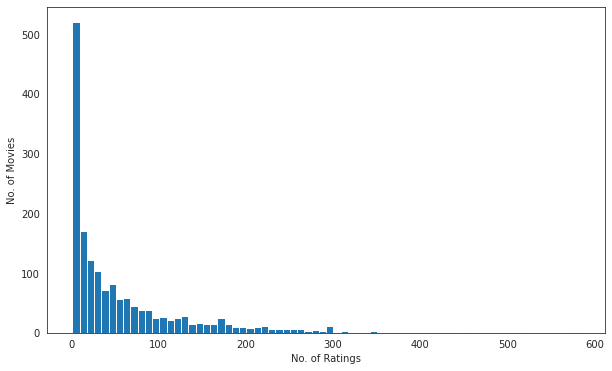

In [ ]:
plt.figure (figsize = (10,6))
plt.hist(dataframe['No. of Ratings'], bins = 70)
plt.xlabel('No. of Ratings')
plt.ylabel('No. of Movies')
plt.show()

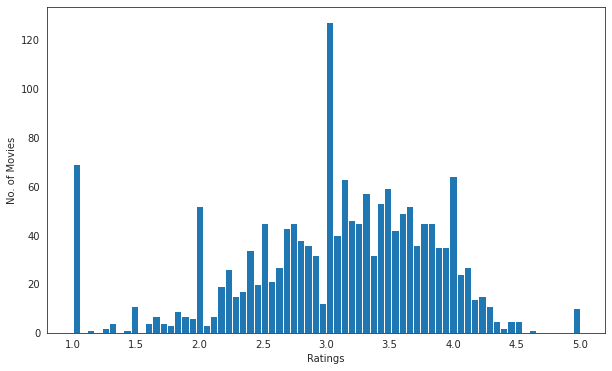

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(dataframe['Ratings'] , bins = 70)
plt.xlabel("Ratings")
plt.ylabel("No. of Movies")
plt.show()

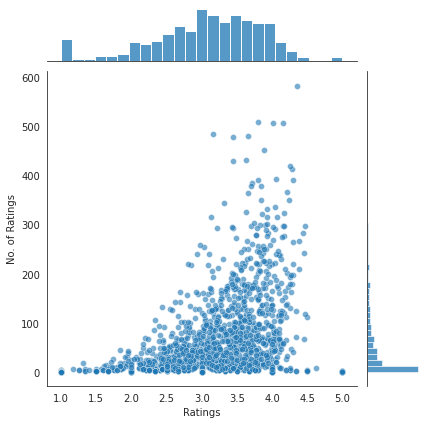

In [ ]:
#sns.set(rc={"figure.figsize":(10, 6)})
sns.jointplot(x = "Ratings" , y = "No. of Ratings" , data = dataframe , alpha = 0.6)

#Creating Movie Recommendation

In [ ]:
dataframe.head()

,Movie Name,Ratings,No. of Ratings
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


In [ ]:
movie_rating_table = df.pivot_table(values = "ratings",index = "user_id" , columns = "movie_name")
movie_rating_table.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [ ]:
star_wars_ratings = movie_rating_table["Star Wars (1977)"]
star_wars_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [ ]:
star_wars_corr = movie_rating_table.corrwith(star_wars_ratings)
star_wars_corr.dropna(inplace = True)
star_wars_corr

movie_name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns (1988)                        0.186377
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Length: 1410, dtype: float64

In [ ]:
star_wars_corr = pd.DataFrame(star_wars_corr , columns =["Correlation"])
star_wars_corr

,Correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [ ]:
temp = dataframe
temp = temp.set_index('Movie Name')
temp
star_wars_corr = star_wars_corr.join(temp["No. of Ratings"])
star_wars_corr

,Correlation,No. of Ratings
movie_name,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [ ]:
star_wars_corr[star_wars_corr["No. of Ratings"]>100].sort_values("Correlation" , ascending = False)

,Correlation,No. of Ratings
movie_name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


#Predict

In [ ]:
def predict(movie):
  movie_ratings = movie_rating_table[movie]

  movie_corr = movie_rating_table.corrwith(movie_ratings)
  movie_corr.dropna(inplace = True)

  movie_corr = pd.DataFrame(movie_corr , columns =["Correlation"])

  movie_corr = movie_corr.join(temp["No. of Ratings"])
  pred = movie_corr[movie_corr["No. of Ratings"]>100].sort_values("Correlation" , ascending = False)
  pred = list(pred.index)
  for i in pred:
    print(i)

predict("Titanic (1997)")

Titanic (1997)
River Wild, The (1994)
Abyss, The (1989)
Bram Stoker's Dracula (1992)
True Lies (1994)
William Shakespeare's Romeo and Juliet (1996)
Last of the Mohicans, The (1992)
Outbreak (1995)
Die Hard (1988)
Frighteners, The (1996)
Air Force One (1997)
Jurassic Park (1993)
Star Trek: Generations (1994)
Father of the Bride Part II (1995)
Waterworld (1995)
E.T. the Extra-Terrestrial (1982)
Pretty Woman (1990)
Eraser (1996)
Twister (1996)
Under Siege (1992)
Maverick (1994)
Dante's Peak (1997)
Braveheart (1995)
Firm, The (1993)
GoldenEye (1995)
G.I. Jane (1997)
Bonnie and Clyde (1967)
Die Hard: With a Vengeance (1995)
This Is Spinal Tap (1984)
Raiders of the Lost Ark (1981)
Indiana Jones and the Last Crusade (1989)
Benny & Joon (1993)
Die Hard 2 (1990)
Ghost and the Darkness, The (1996)
Michael (1996)
Long Kiss Goodnight, The (1996)
Field of Dreams (1989)
Absolute Power (1997)
Dragonheart (1996)
In the Line of Fire (1993)
Speed (1994)
Birdcage, The (1996)
Army of Darkness (1993)
Prima